# 탐색적 데이터 분석(EDA)

## 서울특별시 공공자전거 이용정보 데이터 분석
* 사용 데이터: 서울특별시 공공자전거 이용정보(월 별)
* 데이터 측정 기간: 2024년 7월~12월

# 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

data = pd.read_csv("../data_resources/서울특별시 공공자전거 이용정보(월별)_24.7-12.csv", encoding="cp949")


In [2]:
df = data.copy()
## 대여소명에 대여소번호가 붙어있어서 지도 데이터에 사용하려면 전처리 필요

In [3]:
print(df.shape)
print(df.columns)

(619664, 11)
Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')


# 2. 데이터 정보 확인하기

In [4]:
df.info()
## 대여소명, 대여구분코드, 성별, 연령대코드 는 object 변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  int64  
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.0+ MB


In [5]:
df.describe()
## 이동거리가 매우 큰 값, 이용건수, 이용시간 등과 스케일이 매우 달라 정규화 필요성

,대여일자,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,619664.000000,619664.000000,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000
mean,202409.460550,2372.396744,36.207324,2171.806347,18.868742,8.161182e+04,741.158513
std,1.679584,1606.029446,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371
min,202407.000000,102.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,202408.000000,1003.000000,4.000000,221.250000,2.010000,8.705685e+03,81.000000
50%,202409.000000,2060.000000,12.000000,773.460000,6.950000,3.007392e+04,274.000000
75%,202411.000000,3816.000000,39.000000,2391.900000,21.140000,9.141029e+04,827.000000
max,202412.000000,6178.000000,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000


## 1) 데이터 형변환

* 대여일자 -> datetime, 대여소번호 -> object형
* .astype(str), pd.to_datetime()

In [6]:
## 대여일자 -> datetime, 대여소번호 -> object형
#.astype df.astype({'대여소번호':object, '대여일자':object})

##df["대여일자"] = pd.to_datetime(df.대여일자, format="%Y%m")
df['대여소번호'] = df['대여소번호'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  object 
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 52.0+ MB


#### 데이터 형 변환을 해야 하는 이유

int, float 타입으로 되어 있는 열은 `.describe()`라는 함수를 이용할 때 통계에 이용된돠.
하지만 대여소번호와 같이 고유의 이름을 의미하는 경우에는 통계가 필요없기 때문에 object로 형변환을 해줄 필요가 있다.

#### 대여일자를 datetime으로 바꾸지 않는 이유
우리가 분석하는 이 데이터는 일자별로 계속 측정이 된 게 아니라 **월별**로 집계된 데이터이기 때문에 이 데이터에서 대여일자는 카테고리라고 할 수 있다.

In [7]:
df["대여일자"] = df["대여일자"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  object 
 1   대여소번호    619664 non-null  object 
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 52.0+ MB


## 2) 카테고리 변수 unique 확인하기

* 성별에 결측치가 많다 -> 응답하지 않은 내용이기 때문이다 "O" 라는 새로운 카테고리를 만든다.
* 대문자, 소문자가 섞여있다. -> 대문자로 통일

In [8]:
print(df["성별"].unique())
print(df["성별"].nunique())
# print((df["성별"] == 'm').sum())
print(df[df["성별"] == 'm'].shape[0])
print(df[df["성별"] == 'f'].shape[0])

# df['성별'] = df['성별'].apply(lambda x: "M" if x == 'm' else x)
# df['성별'] = df['성별'].apply(lambda x: "F" if x == 'f' else x)
df["성별"] = df["성별"].str.upper()
df["성별"] = df["성별"].fillna("O")

print(df["성별"].unique())
print(df["성별"].nunique())

[nan 'F' 'M' 'm' 'f']
4
59
33
['O' 'F' 'M']
3


In [9]:
df.대여구분코드.unique()
df.연령대코드.unique()

array(['20대', '30대', '40대', '50대', '60대', '기타', '~10대', '70대이상'],
      dtype=object)

## 3) 대여소명을 이름만 남도록 전처리

In [10]:
#df["대여소명"] = df['대여소명'].apply(lambda x : " ".join(x.split()[1:]))

#df

# 3. 데이터 결측치 확인하기

In [11]:
null_sum = df.isna().sum()
## 약 3분의1의 성별 데이터가 결측인 것으로 확인 - 열 삭제 할지 보간할지 결정 필요
## 운동량 탄소량 395개의 결측치 존재 - 처리 필요

In [12]:
print(null_sum)

대여일자         0
대여소번호        0
대여소명         0
대여구분코드       0
성별           0
연령대코드        0
이용건수         0
운동량        395
탄소량        395
이동거리(M)      0
이용시간(분)      0
dtype: int64


# 4. 데이터 탐색

In [13]:
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6


## 1) 새로운 열 만들기

In [14]:
# 건당 이동거리(M), 건당 이용시간(분) 열을 추가
# 건당 이동거리(M) = 이동거리(M) / 이용건수
# 건당 이용시간(분) = 이용시간(분) / 이용건수

In [15]:
df["건당이동거리(M)"] = df['이동거리(M)'] / df["이용건수"]
df["건당이용시간(분)"] = df['이용시간(분)'] / df["이용건수"]

In [16]:
df.대여소명.unique()

array(['102. 망원역 1번출구 앞', '103. 망원역 2번출구 앞', '104. 합정역 1번출구 앞', ...,
       '4936. SK텔레콤(T1) 인근', '4956. 암사역사공원역 1번출구', '5513. 마포음식문화거리'],
      shape=(2785,), dtype=object)

In [17]:
df.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당이동거리(M),건당이용시간(분)
count,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000,619664.000000,619664.000000
mean,36.207324,2171.806347,18.868742,8.161182e+04,741.158513,2701.308303,24.522191
std,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371,2035.965154,17.922810
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,221.250000,2.010000,8.705685e+03,81.000000,1504.471840,13.866667
50%,12.000000,773.460000,6.950000,3.007392e+04,274.000000,2138.456549,20.300000
75%,39.000000,2391.900000,21.140000,9.141029e+04,827.000000,3235.145285,30.000000
max,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000,74198.100000,863.000000


# 3. 시각화

### 대여가 가장 많았던 월자

In [18]:
new = pd.DataFrame(df.groupby("대여일자")['이용건수'].sum().sort_values(ascending=False))
new.reset_index(inplace=True)
new

,대여일자,이용건수
0,202410,4686753
1,202409,4250763
2,202408,3998334
3,202407,3723233
4,202411,3499197
5,202412,2278095


### 이전 코드 복습해보기

In [19]:
temp_data = df["대여일자"].value_counts().sort_index()
temp_data

대여일자
202407    103502
202408    103316
202409    107191
202410    108791
202411    103677
202412     93187
Name: count, dtype: int64

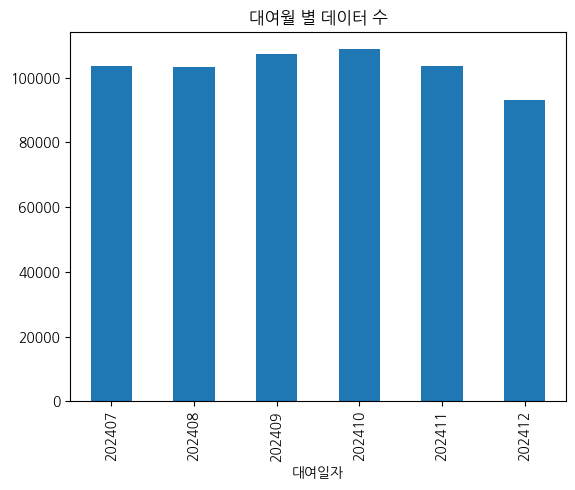

In [20]:
plt.figure()
temp_data.plot(kind="bar")
plt.title("대여월 별 데이터 수")
plt.show()

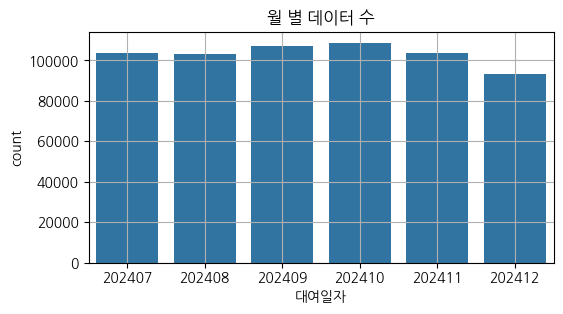

In [21]:
plt.figure(figsize=(6,3))
sns.countplot(x="대여일자", data=df)
plt.title("월 별 데이터 수")
plt.grid()
plt.show()


### 성별로 평균 이동거리, 평균 이용시간

In [22]:
df.groupby("성별")["건당이동거리(M)"].mean()
df.groupby("성별")["건당이용시간(분)"].mean()

성별
F    25.761345
M    23.170525
O    24.805885
Name: 건당이용시간(분), dtype: float64

In [23]:
df.groupby("성별")[["건당이동거리(M)", "건당이용시간(분)"]].mean()


,건당이동거리(M),건당이용시간(분)
성별,,
F,2684.818708,25.761345
M,2668.111610,23.170525
O,2756.297323,24.805885


In [24]:
df.groupby("성별")[["건당이동거리(M)", "건당이용시간(분)"]].agg(func=["min", "max", "mean"])

건당이동거리(M)                        건당이용시간(분)                  
         min       max         mean       min    max       mean
성별                                                             
F        0.0  72120.00  2684.818708       0.0  863.0  25.761345
M        0.0  74198.10  2668.111610       0.0  818.0  23.170525
O        0.0  63853.63  2756.297323       0.0  858.0  24.805885

### 연령대별 이용자수

In [25]:
df.groupby("연령대코드")['이용건수'].sum().sort_values(ascending=False)

연령대코드
20대      6522094
30대      5787547
40대      3577567
50대      2482276
기타       1582176
~10대     1515513
60대       833880
70대이상     135322
Name: 이용건수, dtype: int64

### 대여소 별 이용자수

In [26]:
places = pd.DataFrame(df.groupby("대여소명")["이용건수"].sum().sort_values(ascending=False))
places

,이용건수
대여소명,
2715.마곡나루역 2번 출구,98439
2728.마곡나루역 3번 출구,65977
4217. 한강공원 망원나들목,65749
502. 자양(뚝섬한강공원)역 1번출구 앞,63557
1210. 롯데월드타워(잠실역2번출구 쪽),61994
...,...
2393. 구룡사 앞 교차로 (보도육교),18
2201. 본마을 정류소 앞,15
3306.서울신우초등학교,11


### 대여일자 별 대여 수

In [27]:
df.groupby("대여일자")['이용건수'].sum().sort_values(ascending=False)

대여일자
202410    4686753
202409    4250763
202408    3998334
202407    3723233
202411    3499197
202412    2278095
Name: 이용건수, dtype: int64

### 성별이 남자인 사람의 평균 이동거리, 평균 이동 시간

In [28]:
data_M= df[df["성별"] == 'M']

print("남성의 평균 이동거리", data_M["건당이동거리(M)"].mean())
print("남성의 평균 이용시간", data_M["건당이용시간(분)"].mean())

남성의 평균 이동거리 2668.111610197859
남성의 평균 이용시간 23.17052492378698


#### 월 별 어느 연령 대가 가장 많이 이용했는가

In [29]:
most_used_ages_month = df.groupby(["대여일자", "연령대코드"])['이용건수'].count()
most_used_ages_month

대여일자    연령대코드
202407  20대      16218
        30대      15945
        40대      15181
        50대      13731
        60대       9928
        70대이상     4288
        ~10대     11163
        기타       17048
202408  20대      16231
        30대      15983
        40대      15149
        50대      13617
        60대       9687
        70대이상     4158
        ~10대     11297
        기타       17194
202409  20대      16348
        30대      16230
        40대      15736
        50대      14396
        60대      10433
        70대이상     4564
        ~10대     11625
        기타       17859
202410  20대      16415
        30대      16302
        40대      15863
        50대      14786
        60대      10850
        70대이상     4814
        ~10대     11736
        기타       18025
202411  20대      16202
        30대      16026
        40대      15379
        50대      13931
        60대       9942
        70대이상     4248
        ~10대     11047
        기타       16902
202412  20대      15709
        30대      15142
        40대      138

#### 각 대여소 별 평균 이동 거리, 이용 시간

In [30]:
df.groupby("대여소명")["건당이동거리(M)"].mean()
pd.DataFrame(df.groupby("대여소명")["건당이용시간(분)"].mean().sort_values(ascending=True))

,건당이용시간(분)
대여소명,
5098. LG사이언스파크 W4동,11.241283
1151. 마곡역1번출구,11.335540
2701. 마곡나루역 5번출구 뒤편,11.472757
1190. 마곡역 교차로(2번출구),11.531303
2071. 대림아파트 후문 상가 옆,11.538174
...,...
3627. 압구정나들목,49.578851
249. 여의도중학교 옆,50.417605
"1858. 500번,507번 버스 종점 앞",50.734666


### 연령대별 이동거리, 이용시간의 평균

In [31]:
df.groupby("연령대코드")[["건당이동거리(M)", "건당이용시간(분)"]].agg(func='mean')

,건당이동거리(M),건당이용시간(분)
연령대코드,,
20대,2451.222047,21.016007
30대,2586.120784,22.738673
40대,2878.267933,26.427358
50대,2944.130292,26.260852
60대,2802.546744,26.851123
70대이상,2555.291328,26.713537
~10대,2446.854491,22.019562
기타,2837.790135,26.163822


In [32]:
# df.groupby("연령대코드")[["이동거리(M)", "이용시간(분)"]].sum() / df.groupby("연령대코드")['이용건수'].sum() 


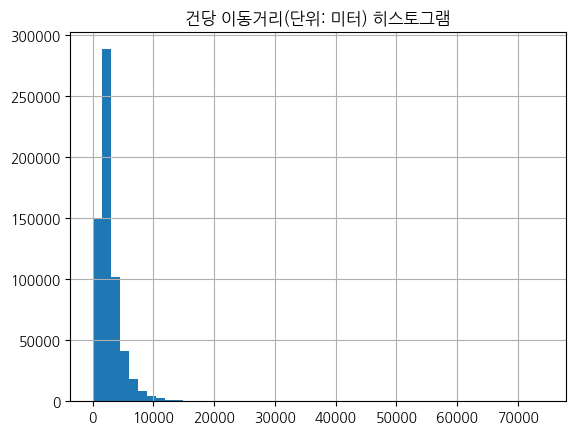

In [65]:
plt.figure()
df["건당이동거리(M)"].hist(bins=50)
plt.title("건당 이동거리(단위: 미터) 히스토그램")
plt.show()

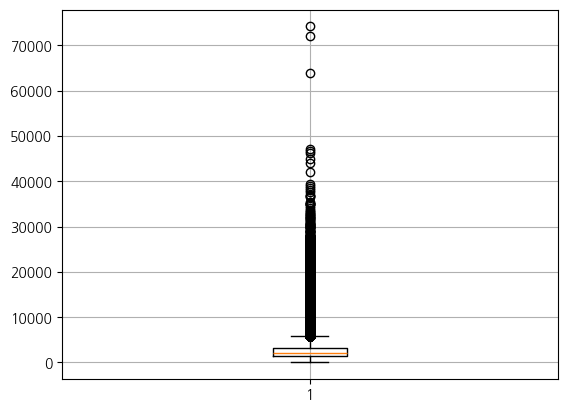

In [70]:
plt.figure()
plt.boxplot(x=df["건당이동거리(M)"])
plt.grid()
plt.show()

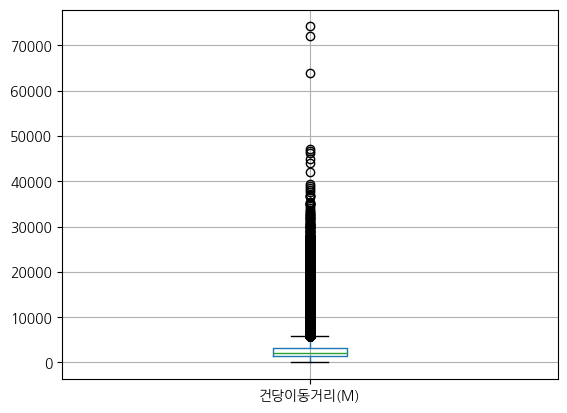

In [63]:
plt.figure()
df.boxplot(column="건당이동거리(M)")
plt.show()

### ⭐ 고민해 볼 것
* 이동거리, 이용시간은 어떻게 집계된 데이터일까? 
    - 대여월-대여소-대여구분-연령대-성별을 unique한 key로서 합쳐진 데이터들의 이동거리와 이용시간을 모두 더한 데이터
* 건당 이동거리, 건당 이용시간이 왜 필요할까? 
    - 여러 이용건을 더한 데이터이기 때문에 건수로 나누어주어 대여월-대여소-대여구분-연령대-성별 key별로 건당 평균 이동거리, 이용시간을 구해줄 필요가 있엇다. (집단의 대표값이 됨)

In [33]:
df.head(10)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당이동거리(M),건당이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000
5,202407,102,102. 망원역 1번출구 앞,일일권,O,기타,23,1922.74,19.53,84195.84,791,3660.688696,34.391304
6,202407,102,102. 망원역 1번출구 앞,일일권,F,20대,107,6962.47,71.10,306432.47,3196,2863.854860,29.869159
7,202407,102,102. 망원역 1번출구 앞,일일권,F,30대,56,3495.03,36.17,158678.07,1437,2833.536964,25.660714
8,202407,102,102. 망원역 1번출구 앞,일일권,F,40대,22,1210.75,11.79,50823.34,470,2310.151818,21.363636
9,202407,102,102. 망원역 1번출구 앞,일일권,F,50대,1,96.70,1.01,4360.70,37,4360.700000,37.000000


In [34]:
# 2024-7 102번 대여소, 일일권, 성별 없는 건들의 집계 데이터
# 평균 이동거리(M) = 이동거리합 / 이용건수
test = df.head(6)

print(test["이동거리(M)"].sum() / test["이용건수"].sum())

test

2826.3968711656444


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당이동거리(M),건당이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000
5,202407,102,102. 망원역 1번출구 앞,일일권,O,기타,23,1922.74,19.53,84195.84,791,3660.688696,34.391304


In [35]:
# 각 행의 대푯값들의 평균
test["건당이동거리(M)"].mean()

np.float64(3078.334318134193)

In [36]:
plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

# 4) 지도 시각화

In [37]:
data2 = pd.read_csv("../data_resources/공공자전거 대여소 정보(api수집).csv")

In [38]:
data2.head()

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5


In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STA_LOC      3170 non-null   object 
 1   RENT_ID      3170 non-null   object 
 2   RENT_NO      3170 non-null   int64  
 3   RENT_NM      3170 non-null   object 
 4   RENT_ID_NM   3170 non-null   object 
 5   HOLD_NUM     3155 non-null   float64
 6   STA_ADD1     3170 non-null   object 
 7   STA_ADD2     1281 non-null   object 
 8   STA_LAT      3170 non-null   float64
 9   STA_LONG     3170 non-null   float64
 10  START_INDEX  3170 non-null   int64  
 11  END_INDEX    3170 non-null   int64  
 12  RNUM         3170 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 322.1+ KB


In [40]:
import folium

#RENT_NO, RENT_ID_NM, STA_LAT, STA_LONG 열만 가죠오기

#필요한 열만 추출

sub_df = data2[['RENT_NO', 'RENT_ID_NM', 'STA_LAT', 'STA_LONG']]

sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RENT_NO     3170 non-null   int64  
 1   RENT_ID_NM  3170 non-null   object 
 2   STA_LAT     3170 non-null   float64
 3   STA_LONG    3170 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 99.2+ KB


In [41]:
#열 이름 변경

sub_df.columns = ['대여소번호', '대여소명', '위도', '경도']

sub_df

,대여소번호,대여소명,위도,경도
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300
...,...,...,...,...
3165,722,722. 경서농협 버스정류장(우리은행신정동지점방향),37.521511,126.857384
3166,723,723. SBS방송국,37.529163,126.872749
3167,724,724. 계남공원 입구 주출입구 좌측,37.510597,126.857323
3168,725,725. 양강중학교앞 교차로,37.524334,126.850548


In [84]:
#df에서 대여소별로 이동거리(M), 이용시간(분), 이용건수의 합 구하기

summary_df = df.groupby("대여소번호")[["이동거리(M)", "이용시간(분)", "이용건수"]].sum()

summary_df.reset_index(inplace=True)
summary_df


,대여소번호,이동거리(M),이용시간(분),이용건수
0,1001,22579951.13,212018,9762
1,1002,37190390.67,349509,15322
2,1003,14033033.55,155349,7385
3,1004,32114486.56,309776,10468
4,1006,2869819.58,26311,1540
...,...,...,...,...
2780,992,3876214.34,28775,993
2781,993,3651995.73,37174,2097
2782,994,2842205.41,24495,1639
2783,995,4923604.57,44168,2544


In [43]:
# #반복문 이해하기
# lat_list = []
# long_list = []

# for name in summary_df["대여소명"].tolist():
#     try:
#         lat_value = sub_df.loc[sub_df["대여소명"] == name, "위도"].values[0] #시리즈라서 값만가져오려고 .values[0] 해줬다
#         long_value = sub_df.loc[sub_df["대여소명"] == name, '경도'].values[0]

#     except Exception as e:
#         lat_value = None
#         long_value = None
#         #print("데이터를 찾을 수 없습니다.")

#     lat_list.append(lat_value)
#     long_list.append(long_value)

# #print(lat_list)
# summary_df["위도"] = lat_list
# summary_df["경도"] = long_list

# summary_df


,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762,37.541794,127.124748
1,1002. 해공공원(천호동),37190390.67,349509,15322,37.545265,127.125938
2,1003. 해공도서관앞,14033033.55,155349,7385,37.543957,127.125488
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468,37.553329,127.128868
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540,37.554867,127.142799
...,...,...,...,...,...,...
2780,992.북한산입구 정류장,3876214.34,28775,993,37.658287,126.945297
2781,993.은평뉴타운 은뜨락아파트앞,3651995.73,37174,2097,37.630287,126.919563
2782,994.북한산생태공원입구(교통섬),2842205.41,24495,1639,37.610508,126.938538
2783,995.은평다목적체육관,4923604.57,44168,2544,37.631409,126.925407


In [44]:
sub_df

,대여소번호,대여소명,위도,경도
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300
...,...,...,...,...
3165,722,722. 경서농협 버스정류장(우리은행신정동지점방향),37.521511,126.857384
3166,723,723. SBS방송국,37.529163,126.872749
3167,724,724. 계남공원 입구 주출입구 좌측,37.510597,126.857323
3168,725,725. 양강중학교앞 교차로,37.524334,126.850548


In [87]:
sub_df["대여소번호"] = sub_df["대여소번호"].astype(str)

summary_df = summary_df.merge(sub_df, how='left', on='대여소번호')

C:\Users\user\AppData\Local\Temp\ipykernel_14532\596898063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["대여소번호"] = sub_df["대여소번호"].astype(str)


In [45]:
#이용건수 top10 뽑기
data_c_top10 = summary_df.sort_values("이용건수", ascending=False).head(10)

In [46]:
#이동거리 top10 뽑기
data_d_top10 = summary_df.sort_values("이동거리(M)", ascending=False).head(10)

In [47]:
#이용시간 top10 뽑기
data_t_top10 = summary_df.sort_values("이용시간(분)", ascending=False).head(10)

In [86]:
new_df

,대여소번호,이동거리(M),이용시간(분),이용건수,대여소명,위도,경도
0,1001,22579951.13,212018,9762,1001. 광진교 남단 사거리(천호공원 방면),37.541794,127.124748
1,1002,37190390.67,349509,15322,1002. 해공공원(천호동),37.545265,127.125938
2,1003,14033033.55,155349,7385,1003. 해공도서관앞,37.543957,127.125488
3,1004,32114486.56,309776,10468,1004. 삼성광나루아파트 버스정류장,37.553329,127.128868
4,1006,2869819.58,26311,1540,1006. 롯데캐슬 115동앞,37.554867,127.142799
...,...,...,...,...,...,...,...
2780,992,3876214.34,28775,993,992.북한산입구 정류장,37.658287,126.945297
2781,993,3651995.73,37174,2097,993.은평뉴타운 은뜨락아파트앞,37.630287,126.919563
2782,994,2842205.41,24495,1639,994.북한산생태공원입구(교통섬),37.610508,126.938538
2783,995,4923604.57,44168,2544,995.은평다목적체육관,37.631409,126.925407


In [88]:
summary_df

,대여소번호,이동거리(M),이용시간(분),이용건수,대여소명,위도,경도
0,1001,22579951.13,212018,9762,1001. 광진교 남단 사거리(천호공원 방면),37.541794,127.124748
1,1002,37190390.67,349509,15322,1002. 해공공원(천호동),37.545265,127.125938
2,1003,14033033.55,155349,7385,1003. 해공도서관앞,37.543957,127.125488
3,1004,32114486.56,309776,10468,1004. 삼성광나루아파트 버스정류장,37.553329,127.128868
4,1006,2869819.58,26311,1540,1006. 롯데캐슬 115동앞,37.554867,127.142799
...,...,...,...,...,...,...,...
2780,992,3876214.34,28775,993,992.북한산입구 정류장,37.658287,126.945297
2781,993,3651995.73,37174,2097,993.은평뉴타운 은뜨락아파트앞,37.630287,126.919563
2782,994,2842205.41,24495,1639,994.북한산생태공원입구(교통섬),37.610508,126.938538
2783,995,4923604.57,44168,2544,995.은평다목적체육관,37.631409,126.925407


In [50]:
import folium

#지도 출력하게
center = [37.565516, 126.978025] # 지도의중심

map = folium.Map(location=center, zoom_start=12)
map

In [90]:
for i in range(len(data_d_top10)):
    temp = data_d_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="red"), popup=temp.name).add_to(map)

map

In [91]:
for i in range(len(data_d_top10)):
    temp = data_t_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="blue"), popup=temp.name).add_to(map)

map

In [ ]:
for i in range(len(data_d_top10)):
    temp = data_c_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="green"), popup=temp.name).add_to(map)

map


<div>
    <img src="https://www.dropbox.com/scl/fi/3s8gvus21mqhcbqkz38zf/.png?rlkey=1kw3p6nleovg9dw6m82ik9izo&dl=1" width="50%">
</div>